In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
#to import dataset
dfr = pd.read_csv('Ratings.csv') 
dfr

,Unnamed: 0,Comment,Rating
0,0,Just unboxed the phone. Seems to be a better o...,5.0
1,1,"This is perfect phone, good speed, decent spec...",5.0
2,2,A very satisfying experience with the device s...,5.0
3,3,It's a real monster. Everything is awesome fro...,5.0
4,4,I am using this phone for the last one week an...,5.0
...,...,...,...
19702,19702,Best product full HD video . really it's excel...,4
19703,19703,It's a very good product. I loved your product...,5
19704,19704,"After 20 days, I write my review of TV, Its ex...",4
19705,19705,Delivered with 24 hrs of booking. Excellent pa...,5


In [5]:
dfr.shape

(19707, 3)

In [6]:

#Getting general information of the data.
dfr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19707 entries, 0 to 19706
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  19707 non-null  int64 
 1   Comment     19309 non-null  object
 2   Rating      19707 non-null  object
dtypes: int64(1), object(2)
memory usage: 462.0+ KB


In [7]:
#Finding the null values in the columns of dataset
dfr.isnull().sum()

Unnamed: 0      0
Comment       398
Rating          0
dtype: int64

In [8]:

dfr[dfr['Comment'].isnull()].index

Int64Index([  551,   660,   683,   693,   703,   713,   723,   793,   803,
              813,
            ...
            17322, 17324, 17459, 17465, 17471, 17477, 17483, 17489, 17495,
            17501],
           dtype='int64', length=398)

In [9]:

search =[" ","?","-"," ?"," -","? ","- "," ? "," - ","NA","N/A"," NA"," N/A"]
for c in dfr:
    for s in search:
        print(f"{s} in {c} = ",end= " ")
        print((dfr[c] == s).sum())

  in Unnamed: 0 =  0
? in Unnamed: 0 =  0
- in Unnamed: 0 =  0
 ? in Unnamed: 0 =  0
 - in Unnamed: 0 =  0
?  in Unnamed: 0 =  0
-  in Unnamed: 0 =  0
 ?  in Unnamed: 0 =  0
 -  in Unnamed: 0 =  0
NA in Unnamed: 0 =  0
N/A in Unnamed: 0 =  0
 NA in Unnamed: 0 =  0
 N/A in Unnamed: 0 =  0
  in Comment =  0
? in Comment =  0
- in Comment =  15
 ? in Comment =  0
 - in Comment =  0
?  in Comment =  0
-  in Comment =  0
 ?  in Comment =  0
 -  in Comment =  0
NA in Comment =  0
N/A in Comment =  0
 NA in Comment =  0
 N/A in Comment =  0
  in Rating =  0
? in Rating =  0
- in Rating =  57
 ? in Rating =  0
 - in Rating =  0
?  in Rating =  0
-  in Rating =  0
 ?  in Rating =  0
 -  in Rating =  0
NA in Rating =  0
N/A in Rating =  0
 NA in Rating =  0
 N/A in Rating =  0


In [10]:
print(dfr["Rating"].value_counts())

5.0    4102
4.0    3610
1.0    3544
2.0    3168
3.0    3021
5      1597
4       438
3       170
-        57
Name: Rating, dtype: int64


In [11]:

dfr.dropna(inplace=True)

In [12]:

#Droping unnecessary column
dfr = dfr.drop(["Unnamed: 0"],axis=1)

In [13]:

dfr.shape

(19309, 2)

In [14]:
# Replacing the string entries in target column
dfr['Rating'] = dfr['Rating'].replace('1.0',1)
dfr['Rating'] = dfr['Rating'].replace('2.0',2)
dfr['Rating'] = dfr['Rating'].replace('3.0',3)
dfr['Rating'] = dfr['Rating'].replace('4.0',4)
dfr['Rating'] = dfr['Rating'].replace('5.0',5)
dfr['Rating'] = dfr['Rating'].replace('5',5)
dfr['Rating'] = dfr['Rating'].replace('4',4)
dfr['Rating'] = dfr['Rating'].replace('3',3)

In [15]:
print(dfr["Rating"].value_counts())

5    5611
4    3943
1    3451
3    3125
2    3122
-      57
Name: Rating, dtype: int64


In [16]:
print(dfr["Rating"].mode())

0    5
Name: Rating, dtype: object


In [17]:
# replacing '-' with mode which is 5
dfr['Rating'] = dfr.Rating.replace('-', '5')

In [18]:
print(dfr["Rating"].value_counts())

5    5611
4    3943
1    3451
3    3125
2    3122
5      57
Name: Rating, dtype: int64


In [19]:
dfr['Rating'] = dfr['Rating'].replace('5',5)

In [20]:
print(dfr["Rating"].value_counts())

5    5668
4    3943
1    3451
3    3125
2    3122
Name: Rating, dtype: int64


In [21]:
# deleting rows with no comments instead '-' sign
index_name = dfr[ dfr['Comment'] == '-' ].index
index_name

Int64Index([  297,   298,   299, 13287, 13288, 13289, 15739, 15740, 15741,
            15742, 15743, 15744, 15745, 15746, 15747],
           dtype='int64')

In [22]:
dfr.drop(index_name , inplace=True)

In [23]:
dfr.shape

(19294, 2)

In [24]:
search =[" ","?","-"," ?"," -","? ","- "," ? "," - ","NA","N/A"," NA"," N/A"]
for c in dfr:
    for s in search:
        print(f"{s} in {c} = ",end= " ")
        print((dfr[c] == s).sum())

  in Comment =  0
? in Comment =  0
- in Comment =  0
 ? in Comment =  0
 - in Comment =  0
?  in Comment =  0
-  in Comment =  0
 ?  in Comment =  0
 -  in Comment =  0
NA in Comment =  0
N/A in Comment =  0
 NA in Comment =  0
 N/A in Comment =  0
  in Rating =  0
? in Rating =  0
- in Rating =  0
 ? in Rating =  0
 - in Rating =  0
?  in Rating =  0
-  in Rating =  0
 ?  in Rating =  0
 -  in Rating =  0
NA in Rating =  0
N/A in Rating =  0
 NA in Rating =  0
 N/A in Rating =  0


In [25]:
# to change data type
dfr["Rating"] = dfr.Rating.astype('int')

In [26]:
dfr.dtypes

Comment    object
Rating      int32
dtype: object

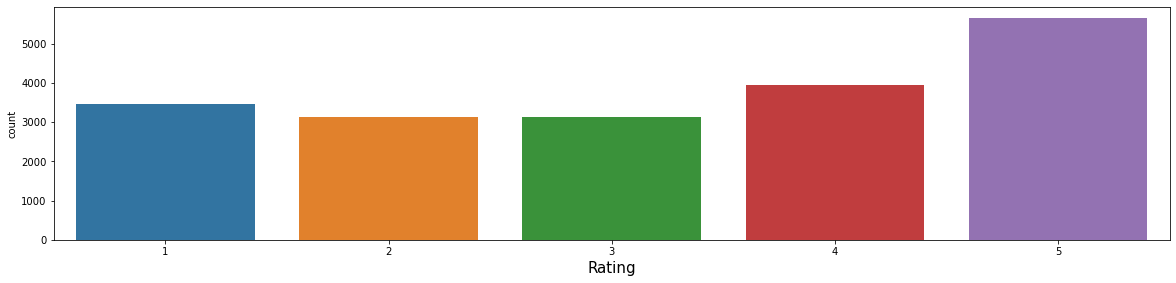

In [27]:
plt.figure(figsize=(20,30),facecolor='white')
plotnum=1
for col in dfr.drop(columns = ['Comment'],axis=1):
    if plotnum<=6:
        plt.subplot(6,1,plotnum)
        sns.countplot(dfr[col])
        plt.xlabel(col,fontsize=15)
    plotnum+=1
plt.show()

In [28]:
#Creating a length column with records of total string length of each comment text
dfr['Stringlength'] = dfr['Comment'].str.len()
dfr.head()

,Comment,Rating,Stringlength
0,Just unboxed the phone. Seems to be a better o...,5,232
1,"This is perfect phone, good speed, decent spec...",5,153
2,A very satisfying experience with the device s...,5,800
3,It's a real monster. Everything is awesome fro...,5,376
4,I am using this phone for the last one week an...,5,1132


<AxesSubplot:xlabel='Stringlength', ylabel='Density'>

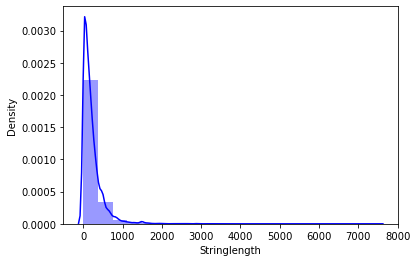

In [29]:
#Distribution of string length
sns.distplot(dfr.Stringlength, bins=20, color = 'blue')

In [30]:
import re
import string

In [31]:
# Convert all messages to lower case
dfr['Comment'] = dfr['Comment'].str.lower()


dfr['Comment'] = dfr['Comment'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress') # Replace email addresses with 'email'

# Replace URLs with 'webaddress'
dfr['Comment'] = dfr['Comment'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')


dfr['Comment'] = dfr['Comment'].str.replace(r'£|\$', 'dollars')# Replace money symbols with 'moneysymb' 

# Replacing 10 digit phone numbers with 'phonenumber'
dfr['Comment'] = dfr['Comment'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

dfr['Comment'] = dfr['Comment'].str.replace(r'\d+(\.\d+)?','num') # Replace numbers with 'num'


dfr['Comment'] = dfr['Comment'].str.replace(r'[^\w\d\s]',' ') #removing punctuations

dfr['Comment'] = dfr['Comment'].str.replace(r'[\_]',' ') #removing underscore characters

dfr['Comment'] = dfr['Comment'].str.replace(r'\s+[a-zA-Z]\s+', ' ') #removing single characters

dfr['Comment'] = dfr['Comment'].str.replace(r'\s+', ' ') #removing whitespace between terms with a single space

dfr['Comment'] = dfr['Comment'].str.replace(r'^\s+|\s+?$', ' ') #removing leading and trailing whitespace

In [32]:
dfr

,Comment,Rating,Stringlength
0,just unboxed the phone seems to be better one ...,5,232
1,this is perfect phone good speed decent specs ...,5,153
2,a very satisfying experience with the device s...,5,800
3,it a real monster everything is awesome from d...,5,376
4,i am using this phone for the last one week an...,5,1132
...,...,...,...
19702,best product full hd video really it excellent...,4,188
19703,it a very good product loved your product the ...,5,111
19704,after num days write my review of tv its excel...,4,272
19705,delivered with num hrs of booking excellent pa...,5,306


In [33]:
import nltk
nltk.download('wordnet')
from nltk.corpus import stopwords,wordnet
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Nirav\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [34]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nirav\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [35]:
stop_words = set(stopwords.words('english') + ['u','m', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin',"u're", 'ure'])
dfr['Comment'] = dfr['Comment'].apply(lambda x: " ".join(x.lower() for x in str(x).split() \
                                    if x not in stop_words))

In [36]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Nirav\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [37]:
lem=WordNetLemmatizer()
dfr['Comment'] = dfr['Comment'].apply(lambda x: ' '.join(lem.lemmatize(t) for t in str(x).split()))

In [38]:
dfr

,Comment,Rating,Stringlength
0,unboxed phone seems better one price segment c...,5,232
1,perfect phone good speed decent spec outstandi...,5,153
2,satisfying experience device far pro num long ...,5,800
3,real monster everything awesome display proces...,5,376
4,using phone last one week noticed positive neg...,5,1132
...,...,...,...
19702,best product full hd video really excellent tv...,4,188
19703,good product loved product delivery also good ...,5,111
19704,num day write review tv excellent picture qual...,4,272
19705,delivered num hr booking excellent packing eka...,5,306


In [39]:
dfr['Cleaned_Stringlength'] = dfr['Comment'].str.len()
dfr.head()

,Comment,Rating,Stringlength,Cleaned_Stringlength
0,unboxed phone seems better one price segment c...,5,232,150
1,perfect phone good speed decent spec outstandi...,5,153,103
2,satisfying experience device far pro num long ...,5,800,564
3,real monster everything awesome display proces...,5,376,258
4,using phone last one week noticed positive neg...,5,1132,741


In [40]:

dfr

,Comment,Rating,Stringlength,Cleaned_Stringlength
0,unboxed phone seems better one price segment c...,5,232,150
1,perfect phone good speed decent spec outstandi...,5,153,103
2,satisfying experience device far pro num long ...,5,800,564
3,real monster everything awesome display proces...,5,376,258
4,using phone last one week noticed positive neg...,5,1132,741
...,...,...,...,...
19702,best product full hd video really excellent tv...,4,188,131
19703,good product loved product delivery also good ...,5,111,65
19704,num day write review tv excellent picture qual...,4,272,187
19705,delivered num hr booking excellent packing eka...,5,306,218


<AxesSubplot:xlabel='Cleaned_Stringlength', ylabel='Density'>

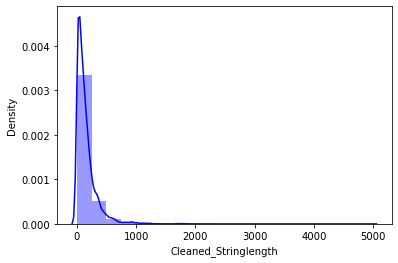

In [41]:
#Distribution of cleaned string length
sns.distplot(dfr.Cleaned_Stringlength, bins=20, color = 'blue')

In [42]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [43]:
from wordcloud import WordCloud

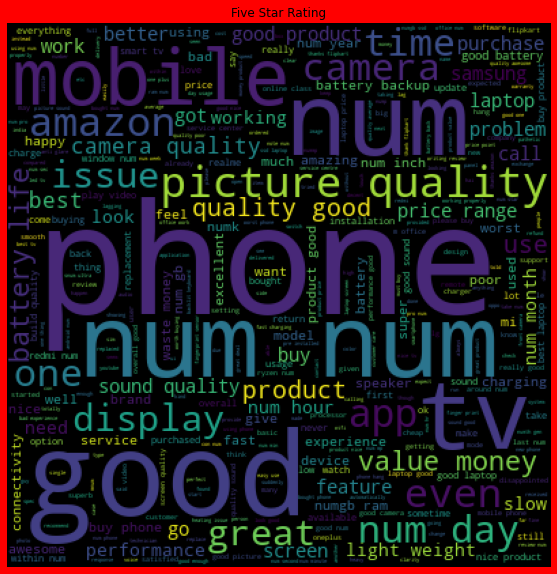

In [44]:
five=dfr['Comment'][dfr['Rating']==5]
wrdcld= WordCloud(width=400,height=400,background_color='black',max_words=400).generate(' '.join(five))
plt.figure(figsize=(10,10),facecolor = 'r')
plt.imshow(wrdcld)
plt.axis('off')
plt.title(label='Five Star Rating')
plt.show()

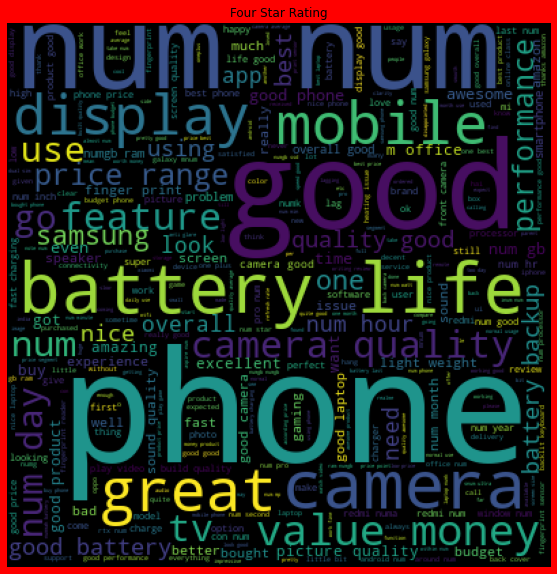

In [45]:
four=dfr['Comment'][dfr['Rating']==4]
wrdcld= WordCloud(width=400,height=400,background_color='black',max_words=400).generate(' '.join(four))
plt.figure(figsize=(10,10),facecolor = 'r')
plt.imshow(wrdcld)
plt.axis('off')
plt.title(label='Four Star Rating')
plt.show()

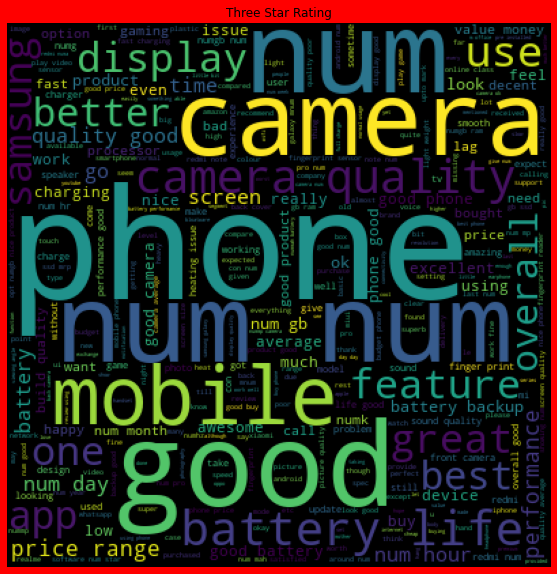

In [46]:
three=dfr['Comment'][dfr['Rating']==3]
wrdcld= WordCloud(width=400,height=400,background_color='black',max_words=400).generate(' '.join(three))
plt.figure(figsize=(10,10),facecolor = 'r')
plt.imshow(wrdcld)
plt.axis('off')
plt.title(label='Three Star Rating')
plt.show()

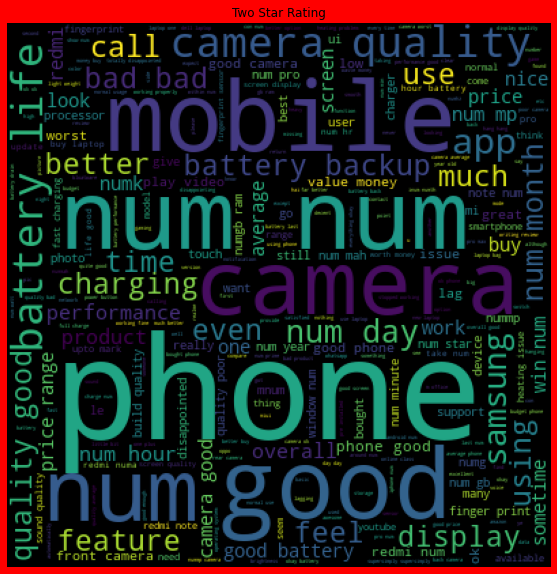

In [47]:
two=dfr['Comment'][dfr['Rating']==2]
wrdcld= WordCloud(width=400,height=400,background_color='black',max_words=400).generate(' '.join(two))
plt.figure(figsize=(10,10),facecolor = 'r')
plt.imshow(wrdcld)
plt.axis('off')
plt.title(label='Two Star Rating')
plt.show()

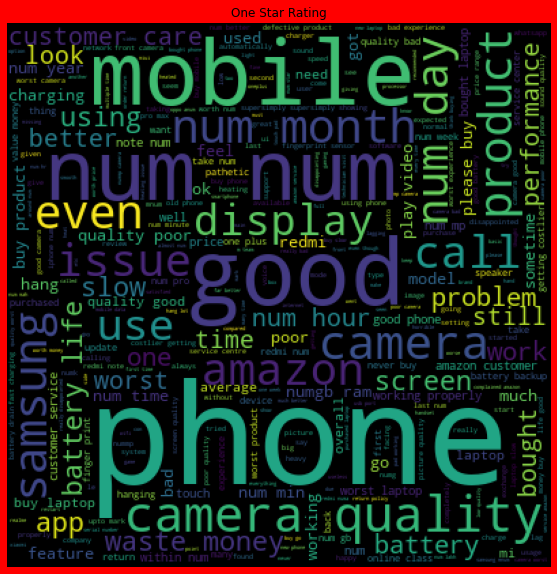

In [48]:
one=dfr['Comment'][dfr['Rating']==1]
wrdcld= WordCloud(width=400,height=400,background_color='black',max_words=400).generate(' '.join(one))
plt.figure(figsize=(10,10),facecolor = 'r')
plt.imshow(wrdcld)
plt.axis('off')
plt.title(label='One Star Rating')
plt.show()

In [49]:
dfr.drop(columns=[ 'Cleaned_Stringlength','Stringlength' ],inplace = True)

In [50]:
from collections import Counter

In [51]:
fiv = Counter(",".join(dfr[dfr['Rating']==5]["Comment"]).split()).most_common(10)
fr = Counter(",".join(dfr[dfr['Rating']==4]["Comment"]).split()).most_common(10)
thr = Counter(",".join(dfr[dfr['Rating']==3]["Comment"]).split()).most_common(10)
tw = Counter(",".join(dfr[dfr['Rating']==2]["Comment"]).split()).most_common(10)
one = Counter(",".join(dfr[dfr['Rating']==1]["Comment"]).split()).most_common(10)
Countdf=pd.DataFrame()
print("TOP 10 Words and Ratings,with their counts")
Countdf['Five Star Words']=fiv
Countdf['Four Star Words']=fr
Countdf['Three Star Words']=thr
Countdf['Two Star Words']=tw
Countdf['One Star Words']=one
Countdf.head(10)

TOP 10 Words and Ratings,with their counts


,Five Star Words,Four Star Words,Three Star Words,Two Star Words,One Star Words
0,"(num, 5590)","(num, 4690)","(num, 3656)","(num, 3452)","(num, 3001)"
1,"(good, 2568)","(good, 2604)","(good, 1949)","(phone, 1654)","(phone, 1740)"
2,"(phone, 2549)","(phone, 2115)","(phone, 1655)","(good, 1305)","(laptop, 971)"
3,"(quality, 1759)","(camera, 1386)","(camera, 1291)","(camera, 1197)","(camera, 970)"
4,"(product, 1335)","(battery, 1294)","(battery, 983)","(battery, 940)","(quality, 807)"
5,"(laptop, 1303)","(quality, 1104)","(quality, 928)","(quality, 872)","(product, 756)"
6,"(camera, 1090)","(price, 817)","(price, 585)","(laptop, 700)","(good, 755)"
7,"(tv, 1056)","(laptop, 683)","(also, 473)","(like, 559)","(amazon, 660)"
8,"(battery, 1052)","(best, 592)","(screen, 464)","(also, 470)","(buy, 606)"
9,"(price, 906)","(product, 586)","(display, 429)","(one, 455)","(time, 601)"


In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [53]:
tf_vec = TfidfVectorizer(max_features=50000,smooth_idf=False, stop_words='english')

In [54]:
features = tf_vec.fit_transform(dfr['Comment'])

In [55]:
X = features
y=dfr['Rating']

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [57]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [58]:
import sklearn

In [59]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [60]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [61]:
import sklearn

In [62]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [63]:
from imblearn.over_sampling import SMOTE as sm

smt_x,smt_y = sm().fit_resample(X,y)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
maxAcc = 0
maxRS=0
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(smt_x,smt_y,test_size = .30, random_state = i)
    modRF =  RandomForestClassifier()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc  = accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

In [64]:
x_train,x_test,y_train,y_test = train_test_split(smt_x,smt_y,test_size = .30,random_state = 92)

In [65]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [66]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import log_loss
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB, GaussianNB,BernoulliNB
from sklearn.naive_bayes import ComplementNB

In [67]:
RFC = RandomForestClassifier()
adbc = AdaBoostClassifier()
LOGR= LogisticRegression(solver='liblinear')
MNB = MultinomialNB()
CNB = ComplementNB()
pc= PassiveAggressiveClassifier()

In [68]:
RFC.fit(x_train,y_train)
adbc.fit(x_train,y_train)
LOGR.fit(x_train,y_train)
MNB.fit(x_train,y_train)
CNB.fit(x_train,y_train)
pc.fit(x_train,y_train)

PassiveAggressiveClassifier()

In [69]:
LOGRpred = LOGR.predict(x_test)
accu = classification_report(y_test,LOGRpred)

In [70]:
conf_matrx = confusion_matrix(y_test,LOGRpred)
conf_matrx

array([[1194,  228,  126,   61,   78],
       [ 266, 1074,  197,   80,   59],
       [ 144,  215,  962,  220,  153],
       [ 121,  115,  229,  947,  256],
       [ 286,  141,  200,  262,  866]], dtype=int64)

In [71]:
print(accu)

              precision    recall  f1-score   support

           1       0.59      0.71      0.65      1687
           2       0.61      0.64      0.62      1676
           3       0.56      0.57      0.56      1694
           4       0.60      0.57      0.58      1668
           5       0.61      0.49      0.55      1755

    accuracy                           0.59      8480
   macro avg       0.60      0.60      0.59      8480
weighted avg       0.60      0.59      0.59      8480



In [72]:
RFCpred = RFC.predict(x_test)
accu = classification_report(y_test,RFCpred)

In [73]:
conf_matrx = confusion_matrix(y_test,RFCpred)
conf_matrx

array([[1388,  116,   52,   39,   92],
       [ 149, 1339,  119,   37,   32],
       [  56,  113, 1284,  135,  106],
       [  55,   63,  184, 1161,  205],
       [ 211,   50,  146,  210, 1138]], dtype=int64)

In [74]:
print(accu)

              precision    recall  f1-score   support

           1       0.75      0.82      0.78      1687
           2       0.80      0.80      0.80      1676
           3       0.72      0.76      0.74      1694
           4       0.73      0.70      0.71      1668
           5       0.72      0.65      0.68      1755

    accuracy                           0.74      8480
   macro avg       0.74      0.74      0.74      8480
weighted avg       0.74      0.74      0.74      8480



In [75]:
MNBpred = MNB.predict(x_test)
accu = classification_report(y_test,MNBpred)

In [76]:
conf_matrx = confusion_matrix(y_test,MNBpred)

In [77]:
conf_matrx

array([[1102,  251,  188,   77,   69],
       [ 187, 1034,  288,  103,   64],
       [  91,  186,  960,  305,  152],
       [  88,   88,  245,  997,  250],
       [ 305,  149,  199,  334,  768]], dtype=int64)

In [78]:
print(accu)

              precision    recall  f1-score   support

           1       0.62      0.65      0.64      1687
           2       0.61      0.62      0.61      1676
           3       0.51      0.57      0.54      1694
           4       0.55      0.60      0.57      1668
           5       0.59      0.44      0.50      1755

    accuracy                           0.57      8480
   macro avg       0.58      0.57      0.57      8480
weighted avg       0.58      0.57      0.57      8480



In [79]:
CNBpred = CNB.predict(x_test)
accu = classification_report(y_test,CNBpred)

In [80]:

conf_matrx = confusion_matrix(y_test,CNBpred)

In [81]:
conf_matrx

array([[1198,  209,  166,   63,   51],
       [ 211, 1083,  227,  103,   52],
       [ 109,  180,  989,  253,  163],
       [ 108,   78,  242,  976,  264],
       [ 332,  139,  195,  284,  805]], dtype=int64)

In [82]:
print(accu)

              precision    recall  f1-score   support

           1       0.61      0.71      0.66      1687
           2       0.64      0.65      0.64      1676
           3       0.54      0.58      0.56      1694
           4       0.58      0.59      0.58      1668
           5       0.60      0.46      0.52      1755

    accuracy                           0.60      8480
   macro avg       0.60      0.60      0.59      8480
weighted avg       0.60      0.60      0.59      8480



In [83]:
pcpred = pc.predict(x_test)
accu = classification_report(y_test,pcpred)

In [84]:
conf_matrx = confusion_matrix(y_test,pcpred)

In [85]:
conf_matrx

array([[1324,  138,   88,   33,  104],
       [ 182, 1276,  133,   59,   26],
       [ 142,  159, 1102,  177,  114],
       [ 102,   72,  145, 1170,  179],
       [ 238,   92,  151,  280,  994]], dtype=int64)

In [86]:
print(accu)

              precision    recall  f1-score   support

           1       0.67      0.78      0.72      1687
           2       0.73      0.76      0.75      1676
           3       0.68      0.65      0.67      1694
           4       0.68      0.70      0.69      1668
           5       0.70      0.57      0.63      1755

    accuracy                           0.69      8480
   macro avg       0.69      0.69      0.69      8480
weighted avg       0.69      0.69      0.69      8480



In [87]:
adbcpred = adbc.predict(x_test)
accu = classification_report(y_test,adbcpred)

In [88]:
conf_matrx = confusion_matrix(y_test,adbcpred)
conf_matrx

array([[1125,  198,  189,   57,  118],
       [ 694,  430,  321,  107,  124],
       [ 430,  231,  546,  305,  182],
       [ 303,  124,  391,  600,  250],
       [ 560,   93,  228,  344,  530]], dtype=int64)

In [89]:

print(accu)

              precision    recall  f1-score   support

           1       0.36      0.67      0.47      1687
           2       0.40      0.26      0.31      1676
           3       0.33      0.32      0.32      1694
           4       0.42      0.36      0.39      1668
           5       0.44      0.30      0.36      1755

    accuracy                           0.38      8480
   macro avg       0.39      0.38      0.37      8480
weighted avg       0.39      0.38      0.37      8480



In [90]:
from sklearn.model_selection import cross_val_score as cvs

In [91]:
print(cvs(LOGR,smt_x,smt_y,cv=5).mean()) 

0.5275428975765081


In [92]:
print(cvs(RFC,smt_x,smt_y,cv=5).mean())

0.694498496373607


In [93]:
print(cvs(MNB,smt_x,smt_y,cv=5).mean())

0.5085087564125244


In [94]:

print(cvs(CNB,smt_x,smt_y,cv=5).mean())

0.5292411109145587


In [95]:
print(cvs(pc,smt_x,smt_y,cv=5).mean())

0.6724924818680347


In [96]:
print(cvs(adbc,smt_x,smt_y,cv=5).mean())

0.32004245533345127


In [97]:
pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.


In [98]:
import scikitplot as sktplt

In [99]:
lr_prob = LOGR.predict_proba(x_test)
rf_prob = RFC.predict_proba(x_test)
adbc_prob = adbc.predict_proba(x_test)
mnb_prob = MNB.predict_proba(x_test)
cnb_prob = CNB.predict_proba(x_test)

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

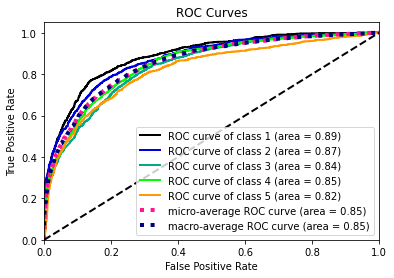

In [100]:
sktplt.metrics.plot_roc(y_test,lr_prob) #Logistic Regression ROC Curves

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

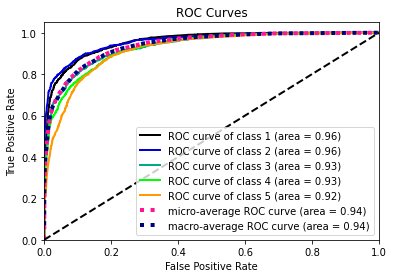

In [101]:
sktplt.metrics.plot_roc(y_test,rf_prob) # Random Forest Classifier ROC Curves

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

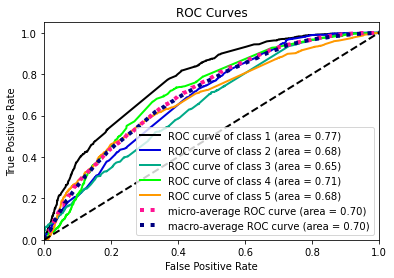

In [102]:
sktplt.metrics.plot_roc(y_test,adbc_prob) # Ada Boost Classifier ROC Curve

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

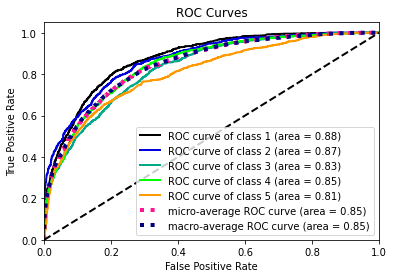

In [103]:
sktplt.metrics.plot_roc(y_test,mnb_prob) #Multinomial Naive Bayes ROC Curves

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

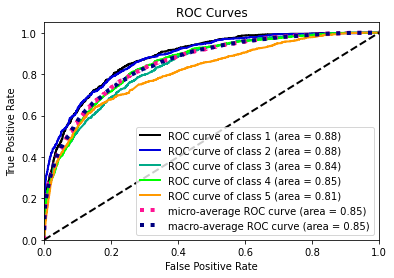

In [104]:
sktplt.metrics.plot_roc(y_test,cnb_prob) #Complement Naive Bayes ROC Curves

In [105]:
roc_auc_score(y_test,lr_prob,multi_class='ovo')

0.8549024793010542

In [106]:
roc_auc_score(y_test,mnb_prob,multi_class='ovo')

0.8463975289368998

In [107]:
roc_auc_score(y_test,cnb_prob,multi_class='ovo')

0.8523703668343444

In [108]:
roc_auc_score(y_test,adbc_prob,multi_class='ovo')

0.6997113585156567

In [109]:
roc_auc_score(y_test,rf_prob,multi_class='ovo')

0.9395161770819603

In [110]:
parameter = {'n_estimators':[400,500,600],
             'max_depth': [80,90,95],
             'min_samples_leaf':[2,5,30],
             'min_samples_split':[1,2,5],
             'criterion':['gini','entropy'],
             'max_features': ['auto', 'sqrt', 'log2']}

In [111]:
from sklearn.model_selection import GridSearchCV

In [112]:

GridCV = GridSearchCV(RandomForestClassifier(),parameter,cv=5,n_jobs = -1,verbose = 1)

In [ ]:
GridCV.fit(x_train,y_train)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits


In [ ]:
GridCV.best_params_

In [ ]:
Best_mod = RandomForestClassifier(n_estimators = 500,criterion = 'entropy', max_depth= 95, max_features = 'sqrt',min_samples_leaf = 2, min_samples_split = 2)
Best_mod.fit(x_train,y_train)
rfpred = Best_mod.predict(x_test)
acc = accuracy_score(y_test,rfpred)
print(acc*100)
conf_matrx = confusion_matrix(y_test,rfpred)
conf_matrx

In [ ]:
import joblib
joblib.dump(Best_mod,"BestModelRatingsClassifier.pkl")

In [ ]:
mod=joblib.load("BestModelRatingsClassifier.pkl")

In [ ]:

mod.predict(x_test)

In [ ]:
Prediction_accuracy = pd.DataFrame({'Predictions': mod.predict(x_test), 'Actual Values': y[:8607]})
Prediction_accuracy.head()